In [1]:
import os
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## IDEA:

### Millenials are more likely to use the Citi Bike service than Baby Boomers.

## NULL HYPOTHESIS:

### The proportion of Millenials biking is greater than the proportion of Baby Boomers biking.
##### Millenials are defined as people born between 1981 and 1996 (both inclusive) and baby boomers are defined as people born between 1946 adn 1964 (both inclusive)

### H0: $\frac{\mathrm{millenials}}{\mathrm{total\_people}} > \frac{\mathrm{baby\_boomers}}{\mathrm{total\_people}}$

### H1: $\frac{\mathrm{millenials}}{\mathrm{total\_people}} <= \frac{\mathrm{baby\_boomers}}{\mathrm{total\_people}}$


### Significance level: $\alpha = 0.05$ 

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
            
            if '2017' in datestring or '2018' in datestring:
                os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
                
                os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + os.getenv("PUIDATA"))
                
                os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip")
                
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201611'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

In [5]:
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,331,2016-11-01 00:00:08,2016-11-01 00:05:40,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,419,Carlton Ave & Park Ave,40.695807,-73.973556,21959,Subscriber,1981.0,1
1,740,2016-11-01 00:00:08,2016-11-01 00:12:29,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,265,Stanton St & Chrystie St,40.722293,-73.991475,20172,Subscriber,1991.0,1
2,229,2016-11-01 00:00:11,2016-11-01 00:04:00,3074,Montrose Ave & Bushwick Ave,40.707678,-73.940162,3068,Humboldt St & Varet St,40.703172,-73.940636,22995,Subscriber,1984.0,1
3,155,2016-11-01 00:00:18,2016-11-01 00:02:53,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,3323,W 106 St & Central Park West,40.798186,-73.960591,22022,Subscriber,1973.0,1
4,772,2016-11-01 00:00:23,2016-11-01 00:13:15,346,Bank St & Hudson St,40.736529,-74.006180,432,E 7 St & Avenue A,40.726218,-73.983799,17324,Subscriber,1988.0,1


In [6]:
df.drop(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Gender'], axis=1, inplace=True)

In [7]:
conditions = [
    ((df['Birth Year'] >= 1981)&(df['Birth Year'] <= 1996)),
    ((df['Birth Year'] >= 1946)&(df['Birth Year'] <= 1964))]
choices = ['Millenial', 'Baby Boomer']
df['Generation'] = np.select(conditions, choices, default=None)
df.head()

,Birth Year,Generation
0,1981.0,Millenial
1,1991.0,Millenial
2,1984.0,Millenial
3,1973.0,None
4,1988.0,Millenial


(array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,  600000.]),
 <a list of 7 Text yticklabel objects>)

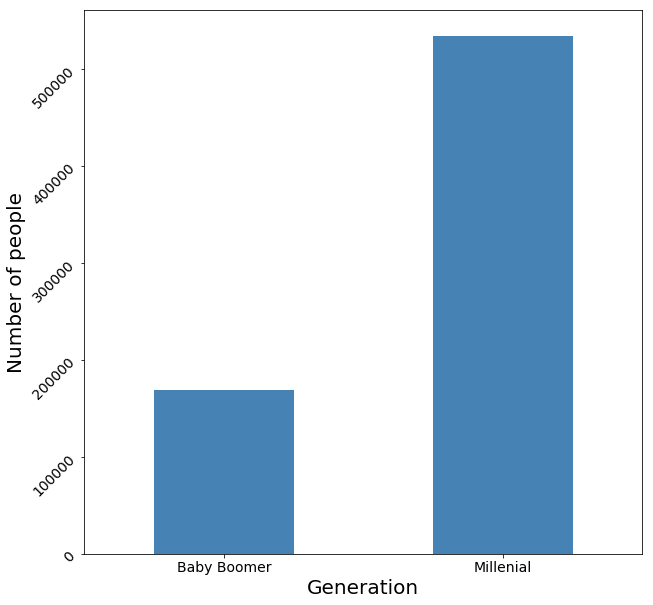

In [8]:
fig = pl.figure(figsize(10,10))
colors = {'Millenial': 'IndianRed', 'Baby Boomer': 'SteelBlue', None:'w'}
#ax = df.T.plot(kind='bar', label='index', colormap='Paired')

(df['Birth Year'].groupby(df['Generation']).count()).plot(kind="bar", color='SteelBlue',rot=0)
pl.xlabel('Generation', fontsize=20)
pl.ylabel('Number of people', fontsize=20)
pl.xticks(fontsize=14)
pl.yticks(fontsize=14, rotation=45)